<a href="https://colab.research.google.com/github/yenlung/Generative-AI-Book/blob/main/%E5%86%92%E9%9A%AA08_%E5%A5%BD%E7%8E%A9%E7%9A%84%E6%96%87%E5%AD%97%E7%94%9F%E5%9C%96_%E9%85%B7%E7%82%AB%E7%9A%84_diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Diffusion Models

和 GAN 一樣, 都是可以給一個我們叫 latent vector 特徵向量, 就生出圖來的 diffusion models, 其實本質上比較接近 autoencoder。

我們之前有說, 用 autoencoder 似乎生不出太不一樣的圖。不過事實證明, 如果讓電腦看夠多, 它就會生出各種各樣的圖來!

傳統 diffusion models 的 latent vector 大小和你要生的圖是一樣的, 如此計算量自然大增、訓練也不易。Stable Diffusion 先訓練一個 VAE 把圖壓下來到我們希望的維度, 再去進行 diffusion models 訓練。

當然更重要的是, Stable Diffusion 是開源的! 於是基於 Stable Diffusion 改善強化的模型也紛紛出籠。繼 `transformers` 之後, HuggingFace 又推出 `diffusers` 方便大家使用酷炫文字生圖的 diffusion models。

我們這裡以 `anything-v4.0` 這個經 `fine-tune` 的 Stable Diffusion 模型，可以產生不錯的可愛動漫圖。

首先先安裝必要套件。

In [ ]:
!pip install transformers
!pip install diffusers["torch"]
!pip install accelerate
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 22.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.6 MB/s eta 0:00:00


### 2. 使用 `diffusers` pipeline 一條龍服務

In [ ]:
import torch

In [ ]:
from diffusers import StableDiffusionPipeline


從預訓練模型讀入。

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("andite/anything-v4.0", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


### 3. 開始創作!

現在你可以打入一段 "咒語", AI 就會幫忙把圖生出來!

In [ ]:
prompt = "a cute girl standing in front of chalkboard"

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

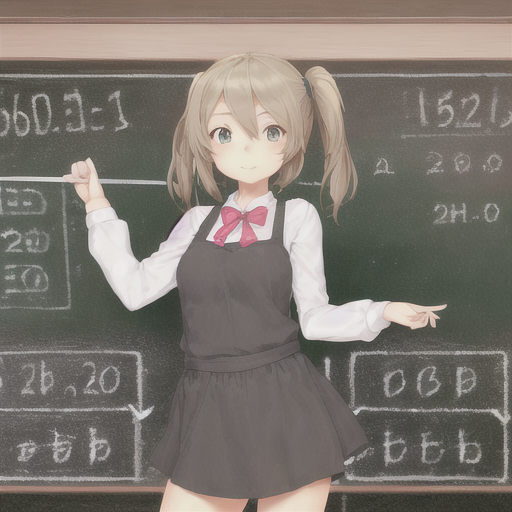

In [ ]:
image

### 4. 其他推薦模型

Stable Diffusion 一般生成並沒有另一個有名的文字生圖 AI 模型出色。但 Stable Diffusion 是 open source 的, 所以自己可以訓練自己想要的模型。也有很多人提供不少出色的模型, 比如我們介紹的 Anything v4。可以發現一些好的模型, 在某風格畫得不錯, 所以可以花點時間找到這些模型的強項。這裡再推薦一些不錯的模型, 大家可以試試看。


#### 【1】 Openjourney V2

模型: `prompthero/openjourney-v2`

看名字就知道是打造開放版的 Midjourney, 可以用 Midjourney 的 prompt。但是不要期待真的效果就和 Midjourney 一樣, 不過在某些風格表現得不錯。

範例的 prompt:

	a little girl, beautiful scenery, backlight, bokeh, hundreds of fireflies in the air around them, dramatic light

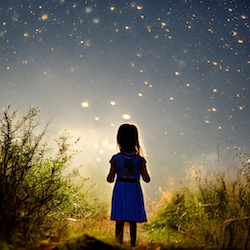

#### 【2】Ghibli Diffusion 吉卜力工作室風格

模型: `nitrosocke/Ghibli-Diffusion`

大家熟悉的吉卜力工作室, 來畫畫這樣風格的插圖吧。

範例 prompt:

	a girl is using a laptop, ghibli style

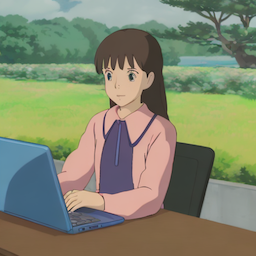

#### 【3】Mo-Di Diffusion 迪士尼風格

模型: `nitrosocke/mo-di-diffusion`

這是 (現代版) 迪士尼風格, 喜歡迪士尼風的快來試試!

範例 prompt:

	a girl in a classroom, modern disney style

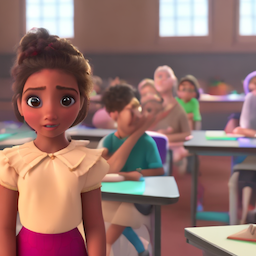

### 5. 用 Gradio 打造 web app!

我們再次動用 Gradio, 快速打造自己的 AI 生圖的網路應用程式!

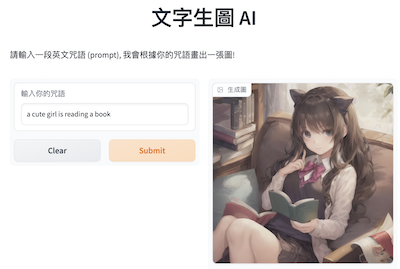

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 K

In [ ]:
import gradio as gr

In [ ]:
def text2image(prompt):
    image = pipe(prompt).images[0]
    return image

In [ ]:
inputs = gr.Textbox(label="輸入你的咒語")
outputs = gr.Image(label="生成圖")

In [ ]:
iface = gr.Interface(text2image,
                     inputs=inputs,
                     outputs=outputs,
                     title="文字生圖 AI",
                     description="請輸入一段英文咒語 (prompt), 我會根據你的咒語畫出一張圖!")

In [ ]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://93ada551ec2e26bf9e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


### 6. 延伸閱讀

#### 【1】完整 Stable Diffusion Webui 環境
這篇是教學範例, 所以只有介紹 diffusers pipline 一條龍服務簡單應用。但你聽說人家用 `automatic1111` 版本, 又是各種 LoRA, 又是 ControlNet 在流口水的話, 請參考這篇高手打造完整 automatic1111 webui:

[Colab 上使用 automatic1111](https://home.gamer.com.tw/artwork.php?sn=5664550)

#### 【2】圖生文字 AI
你是不是好奇, 訓練文字生圖時, AI 怎麼學這樣的文字, 該生什麼圖呢? 那當然是輸一張圖, 讓 AI 告訴我們是什麼。而有時我們要 AI 畫某種樣子的圖，不太會形容, 不如就直接給他看張圖, 告訴我們怎麼描述。這裡我們介紹幾個有名的模型:

* [BLIP](https://huggingface.co/spaces/Salesforce/BLIP): 這是許多人用來訓練 Stable Diffusion 的幫手!
* [CLIP-Interrogator](https://huggingface.co/spaces/pharma/CLIP-Interrogator): 這是試著找出, 在 Stable Diffusion 要產生這樣的圖, 該用什麼樣的 prompt!